<a href="https://colab.research.google.com/github/atharva0329/atharva0329beginners/blob/main/detection_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import OpenCV library for computer vision tasks
import cv2

# Import NumPy library for numerical operations
import numpy as np

# Import matplotlib library for plotting
import matplotlib.pyplot as plt

# Import time module for measuring time
import time

# Import os module for interacting with the operating system
import os

In [ ]:
from google.colab import drive

# Mount Google Drive to the Colab environment
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.chdir('./drive/MyDrive/Crop_and_weed_detection/performing_detection/opencv')

In [ ]:

labelsPath = '../data/names/obj.names'
LABELS = open(labelsPath).read().strip().split("\n")

In [ ]:

weightsPath = '../data/weights/' + 'crop_weed_detection.weights'
configPath = '../data/cfg/crop_weed.cfg'

In [ ]:

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [ ]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


Upload image here

In [ ]:
image = files.upload()


Saving crop_3.jpeg to crop_3 (2).jpeg


In [ ]:
image = cv2.imread(list(image.keys())[0])
(H, W) = image.shape[:2]

In [ ]:
confi = 0.5
thresh = 0.5

In [ ]:

# Get the names of all layers in the network
ln = net.getLayerNames()
# Get the indices of the output layers, which are unconnected in YOLO
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

# Create a blob from the input image
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (512, 512), swapRB=True, crop=False)
# Set the blob as input to the network
net.setInput(blob)

# Record the start time before forward pass
start = time.time()
# Perform a forward pass through the network and get the layer outputs
layerOutputs = net.forward(ln)
# Record the end time after forward pass
end = time.time()

# Print the time taken by the YOLO model for inference
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

# Initialize lists to store detected boxes, confidences, and class IDs
boxes = []
confidences = []
classIDs = []



[INFO] YOLO took 1.209985 seconds


DO NOT CUT THE CROP


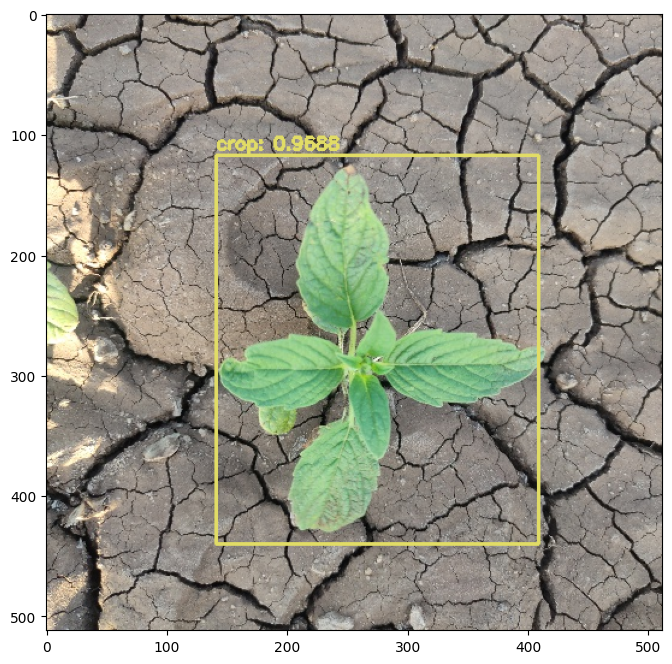

In [ ]:
# Iterate through each output layer's detections
for output in layerOutputs:
    for detection in output:
        # Extract confidence scores and class IDs from the detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        # Check if the confidence of the detected object is above a certain threshold
        if confidence > confi:
            # Calculate bounding box coordinates
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Store bounding box coordinates, confidence, and class ID
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

# Apply non-maximum suppression to remove overlapping bounding boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confi, thresh)

# If there are any remaining detections after non-maximum suppression
if len(idxs) > 0:
    # Loop over the indexes of the remaining detections
    for i in idxs.flatten():
        # Extract bounding box coordinates and draw the box on the image
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

        # Add text indicating the label and confidence score to the image
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Print the label and action to take based on the detected object
        if LABELS[classIDs[i]] == "crop":
            print("DO NOT CUT THE CROP")
        else:
            print("CUT THE CROP")

# Convert the image color space from BGR to RGB
det = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and labels using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(det)
plt.show()


In [ ]:
  import os

# Directory where the images will be saved
directory = '/content/drive/MyDrive/Images/'

# Initialize counter
counter = 1

# Loop until a unique filename is found
while True:
    # Construct the filename with counter
    filename = f'detected_image_{counter}.jpg'
    path = os.path.join(directory, filename)

    # Check if the file already exists
    if not os.path.exists(path):
        break

    # Increment the counter
    counter += 1

# Convert color space back to BGR
det_bgr = cv2.cvtColor(det, cv2.COLOR_RGB2BGR)

# Save the image
cv2.imwrite(path, det_bgr)

print(f"Image saved at: {path}")


Image saved at: /content/drive/MyDrive/Images/detected_image_1.jpg
